In \[1\]:

    unsw_rdd = sc.textFile("/home/wednesday_group/Downloads/UNSW-NB15.csv")

In \[2\]:

    unsw_rdd.count()

Out\[2\]:

    2539739

In \[3\]:

    unsw_rdd.take(1)

Out\[3\]:

    ['59.166.0.3,56716,149.171.126.8,143,tcp,FIN,0.82546002,7812,16236,31,29,30,32,-,75090.25,156111.73,122,126,255,255,2751097753,2748686736,64,129,0,0,445.25928,474.9451,1421970774,1421970775,6.8190908,6.599896,5.9700001E-4,4.6899999E-4,0.000128,0,0,0,0,0,2,7,1,4,1,1,1,,0']

In \[4\]:

    dos_rdd = unsw_rdd.filter(lambda line: 'DoS' in line)
    dos_rdd.count()

Out\[4\]:

    16353

In \[5\]:

    tmp_rdd = unsw_rdd.map(lambda x: x.split(','))
    attacks_rdd = tmp_rdd.map(lambda x: x[47]).distinct()
    attacks_rdd.collect()

Out\[5\]:

    ['',
     'Shellcode',
     'Reconnaissance ',
     'Backdoors',
     'Exploits',
     'Analysis',
     'Reconnaissance',
     'Shellcode ',
     'Generic',
     'Worms',
     'DoS',
     'Backdoor',
     'Fuzzers ',
     'Fuzzers']

In \[6\]:

    attacks_rdd.count()

Out\[6\]:

    14

In \[7\]:

    import numpy as np

    def NumbersAnalysis(line):
        line_split = line.split(",")
        symbolic_indexes = [6,7,8,9,10,11,12,16,17,18,19,20,21,22,23,24,25,26,27,30,31,32,33,34,36,43,44,45,46,40,41,42,48,35]
        clean_line_split = [item for i,item in enumerate(line_split) if i in symbolic_indexes]
        return np.array([float(x) for x in clean_line_split])

In \[8\]:

    numerical_rdd = unsw_rdd.map(NumbersAnalysis)

In \[9\]:

    numerical_rdd.take(2)

Out\[9\]:

    [array([8.25460020e-01, 7.81200000e+03, 1.62360000e+04, 3.10000000e+01,
            2.90000000e+01, 3.00000000e+01, 3.20000000e+01, 1.22000000e+02,
            1.26000000e+02, 2.55000000e+02, 2.55000000e+02, 2.75109775e+09,
            2.74868674e+09, 6.40000000e+01, 1.29000000e+02, 0.00000000e+00,
            0.00000000e+00, 4.45259280e+02, 4.74945100e+02, 6.81909080e+00,
            6.59989600e+00, 5.97000010e-04, 4.68999990e-04, 1.28000000e-04,
            0.00000000e+00, 0.00000000e+00, 2.00000000e+00, 7.00000000e+00,
            1.00000000e+00, 4.00000000e+00, 1.00000000e+00, 1.00000000e+00,
            1.00000000e+00, 0.00000000e+00]),
     array([1.01815000e-01, 4.23800000e+03, 6.56280000e+04, 3.10000000e+01,
            2.90000000e+01, 7.00000000e+00, 3.00000000e+01, 7.20000000e+01,
            7.40000000e+01, 2.55000000e+02, 2.55000000e+02, 9.61515433e+08,
            3.22551066e+09, 5.90000000e+01, 8.87000000e+02, 0.00000000e+00,
            0.00000000e+00, 0.00000000e+00, 9.15795670e+01, 1.42949300e+00,
            1.38719200e+00, 6.80000000e-04, 5.46000020e-04, 1.34000000e-04,
            0.00000000e+00, 0.00000000e+00, 7.00000000e+00, 4.00000000e+00,
            1.00000000e+00, 6.00000000e+00, 1.00000000e+00, 1.00000000e+00,
            1.00000000e+00, 0.00000000e+00])]

In \[10\]:

    from pyspark.mllib.stat import Statistics
    from math import sqrt

    summary = Statistics.colStats(numerical_rdd)
    # [6] :-- performing analysis on column 6 which is sloss(source loss)
    print ("Duration Statistics:")
    print (" Mean: {}".format(round(summary.mean()[6],3)))
    print (" St. deviation: {}".format(round(sqrt(summary.variance()[6]),3)))
    print (" Max value: {}".format(round(summary.max()[6],3)))
    print (" Min value: {}".format(round(summary.min()[6],3)))
    print (" Total value count: {}".format(summary.count()))
    print (" Number of non-zero values: {}".format(summary.numNonzeros()[6]))

    Duration Statistics:
     Mean: 16.331
     St. deviation: 56.598
     Max value: 5507.0
     Min value: 0.0
     Total value count: 2539739
     Number of non-zero values: 1489609.0

In \[12\]:

    import matplotlib.pyplot as plt

    # plotting sloss
    sloss_rdd = tmp_rdd.map(lambda x: int(x[11]))

    plt.plot(sloss_rdd.collect())
    plt.xlabel('values')
    plt.title('Source packets retransmitted or dropped')
    plt.show()

![](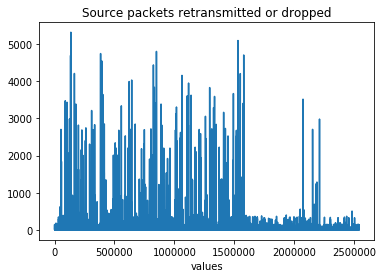%0A)

In \[16\]:

    def Summary_with_Labels(line):
        line_split = line.split(",")
        
        symbolic_indexes = [6,7,8,9,10,11,12,16,17,18,19,20,21,22,23,24,25,26,27,30,31,32,33,34,36,43,44,45,46,40,41,42,48,35]
        clean_line_split = [item for i,item in enumerate(line_split) if i in symbolic_indexes]
        return (line_split[47], np.array([float(x) for x in clean_line_split]))

    label_vector_data = unsw_rdd.map(Summary_with_Labels)

In \[17\]:

    def summary_by_label(raw_data, label):
        label_vector_data = raw_data.map(Summary_with_Labels).filter(lambda x: x[0]==label)
        #print(Statistics.colStats(label_vector_data.values()))
        return Statistics.colStats(label_vector_data.values())

In \[18\]:

    label_list = ["Exploits","Reconnaissance","DoS","Backdoor","Fuzzers","Worms","Generic","Analysis","Shellcode"]



    stats_by_label = [(label, summary_by_label(unsw_rdd, label)) for label in label_list]



    duration_by_label = [
        (stat[0], 
         np.array([
             float(stat[1].mean()[0]), 
             float(sqrt(stat[1].variance()[0])), 
             float(stat[1].min()[0]), 
             float(stat[1].max()[0]), 
             int(stat[1].count())])) 
        for stat in stats_by_label]


    import pandas as pd
    pd.set_option('display.max_columns', 50)

    stats_by_label_df = pd.DataFrame.from_dict(dict(duration_by_label), columns=["Mean", "Std Dev", "Min", "Max", "Count"], orient='index')



    print ("Duration statistics, by label")
    stats_by_label_df

    Duration statistics, by label

Out\[18\]:

|                | Mean     | Std Dev   | Min      | Max       | Count    |
|----------------|----------|-----------|----------|-----------|----------|
| Exploits       | 2.122902 | 7.404824  | 0.000000 | 59.999527 | 44525.0  |
| Reconnaissance | 0.755079 | 3.129905  | 0.000000 | 59.055561 | 1759.0   |
| DoS            | 2.448795 | 10.103664 | 0.000000 | 59.998409 | 16353.0  |
| Backdoor       | 2.612264 | 10.446751 | 0.000000 | 59.879597 | 1795.0   |
| Fuzzers        | 2.294897 | 8.254186  | 0.000000 | 59.974232 | 5051.0   |
| Worms          | 1.333305 | 2.146530  | 0.000002 | 15.887326 | 174.0    |
| Generic        | 0.053270 | 1.194481  | 0.000000 | 59.972233 | 215481.0 |
| Analysis       | 1.416942 | 7.220232  | 0.000000 | 59.932392 | 2677.0   |
| Shellcode      | 0.349142 | 1.003930  | 0.000001 | 13.154288 | 223.0    |

In \[19\]:

    #Applying correlation method on the dataset

    from pyspark.mllib.stat import Statistics 
    correlation_matrix = Statistics.corr(numerical_rdd, method="spearman")

    import pandas as pd
    pd.set_option('display.max_columns', 50)

    col_names = ["dur","sbytes","dbytes","sttl","dttl","sloss","dloss","Spkts","Dpkts","swin","dwin",
    "stcpb","dtcpb","smeansz","dmeansz","trans_depth","res_bdy_len","Sjit","Djit",
    "Sintpkt","Dintpkt","tcprtt","synack","ackdat","is_sm_ips_ports","ct_state_ttl",
    "ct_srv_src","ct_srv_dst","ct_dst_ltm","ct_src_ ltm","ct_src_dport_ltm",
    "ct_dst_sport_ltm","ct_dst_src_ltm","Label"]

    corr_df = pd.DataFrame(
                        correlation_matrix, 
                        index=col_names, 
                        columns=col_names)

    corr_df

Out\[19\]:

|                     | dur       | sbytes    | dbytes    | sttl      | dttl      | sloss     | dloss     | Spkts     | Dpkts     | swin      | dwin      | stcpb     | dtcpb     | smeansz   | dmeansz   | trans\_depth | res\_bdy\_len | Sjit      | Djit      | Sintpkt   | Dintpkt   | tcprtt    | synack    | ackdat    | is\_sm\_ips\_ports | ct\_state\_ttl | ct\_srv\_src | ct\_srv\_dst | ct\_dst\_ltm | ct\_src\_ ltm | ct\_src\_dport\_ltm | ct\_dst\_sport\_ltm | ct\_dst\_src\_ltm | Label     |
|---------------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|--------------|---------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|--------------------|----------------|--------------|--------------|--------------|---------------|---------------------|---------------------|-------------------|-----------|
| dur                 | 1.000000  | 0.741982  | 0.760474  | -0.485806 | 0.677234  | 0.706041  | 0.717792  | 0.762157  | 0.772722  | 0.788536  | 0.789370  | 0.697787  | 0.697825  | -0.020180 | 0.633843  | 0.365354     | 0.349875      | 0.904450  | 0.907308  | 0.928647  | 0.934119  | 0.698407  | 0.693795  | 0.715834  | -0.063742          | -0.306130      | -0.417470    | -0.425519    | -0.387196    | -0.411115     | -0.520460           | -0.573255           | -0.427160         | -0.315940 |
| sbytes              | 0.741982  | 1.000000  | 0.824058  | -0.474155 | 0.496491  | 0.903192  | 0.874260  | 0.933169  | 0.882335  | 0.823806  | 0.826724  | 0.730695  | 0.731303  | 0.151366  | 0.606263  | 0.086990     | 0.085543      | 0.661894  | 0.713750  | 0.618645  | 0.657583  | 0.714087  | 0.714439  | 0.711266  | -0.070327          | -0.432211      | -0.227410    | -0.242659    | -0.280744    | -0.278765     | -0.486916           | -0.477236           | -0.347713         | -0.420843 |
| dbytes              | 0.760474  | 0.824058  | 1.000000  | -0.619038 | 0.616825  | 0.842720  | 0.940981  | 0.918884  | 0.965230  | 0.844887  | 0.848219  | 0.749514  | 0.750189  | -0.228871 | 0.913434  | 0.193981     | 0.198089      | 0.639106  | 0.798159  | 0.620102  | 0.676994  | 0.740326  | 0.743125  | 0.725359  | -0.056843          | -0.458696      | -0.274695    | -0.302241    | -0.382165    | -0.361114     | -0.581465           | -0.599917           | -0.507314         | -0.433709 |
| sttl                | -0.485806 | -0.474155 | -0.619038 | 1.000000  | -0.620578 | -0.442282 | -0.457740 | -0.487235 | -0.613154 | -0.442733 | -0.446744 | -0.395408 | -0.395471 | -0.065635 | -0.647823 | -0.081923    | -0.104207     | -0.352892 | -0.413038 | -0.425048 | -0.497831 | -0.307324 | -0.307350 | -0.307489 | -0.094225          | 0.791584       | 0.476849     | 0.465527     | 0.386863     | 0.403755      | 0.633140            | 0.721989            | 0.568663          | 0.761060  |
| dttl                | 0.677234  | 0.496491  | 0.616825  | -0.620578 | 1.000000  | 0.487820  | 0.472375  | 0.516963  | 0.623034  | 0.587715  | 0.591781  | 0.523313  | 0.523673  | 0.040702  | 0.594338  | 0.169945     | 0.142057      | 0.568027  | 0.575461  | 0.603176  | 0.705120  | 0.582827  | 0.582814  | 0.582533  | -0.076330          | -0.403552      | -0.557346    | -0.569828    | -0.545990    | -0.534810     | -0.688946           | -0.803627           | -0.599520         | -0.422723 |
| sloss               | 0.706041  | 0.903192  | 0.842720  | -0.442282 | 0.487820  | 1.000000  | 0.935851  | 0.940792  | 0.913513  | 0.889476  | 0.889308  | 0.786006  | 0.786655  | -0.094213 | 0.643028  | 0.011217     | 0.008629      | 0.630712  | 0.689639  | 0.551064  | 0.601792  | 0.783473  | 0.786199  | 0.771690  | -0.043225          | -0.319108      | -0.216104    | -0.237741    | -0.293386    | -0.270807     | -0.454317           | -0.458739           | -0.376601         | -0.313033 |
| dloss               | 0.717792  | 0.874260  | 0.940981  | -0.457740 | 0.472375  | 0.935851  | 1.000000  | 0.965565  | 0.964645  | 0.881307  | 0.883749  | 0.780948  | 0.781692  | -0.262588 | 0.799563  | 0.107678     | 0.112631      | 0.615970  | 0.741579  | 0.551981  | 0.590636  | 0.778544  | 0.781864  | 0.761888  | -0.042883          | -0.337515      | -0.184130    | -0.212435    | -0.301378    | -0.272669     | -0.452979           | -0.452522           | -0.403477         | -0.322103 |
| Spkts               | 0.762157  | 0.933169  | 0.918884  | -0.487235 | 0.516963  | 0.940792  | 0.965565  | 1.000000  | 0.969773  | 0.863573  | 0.865433  | 0.764819  | 0.765544  | -0.153806 | 0.724119  | 0.064346     | 0.065719      | 0.654974  | 0.752721  | 0.618578  | 0.647278  | 0.759995  | 0.762874  | 0.745626  | -0.070543          | -0.355195      | -0.203403    | -0.225887    | -0.305043    | -0.287632     | -0.491982           | -0.494455           | -0.392334         | -0.340104 |
| Dpkts               | 0.772722  | 0.882335  | 0.965230  | -0.613154 | 0.623034  | 0.913513  | 0.964645  | 0.969773  | 1.000000  | 0.852071  | 0.855356  | 0.755810  | 0.756528  | -0.193890 | 0.820230  | 0.100337     | 0.103551      | 0.641551  | 0.764944  | 0.614688  | 0.676191  | 0.747601  | 0.750696  | 0.733057  | -0.056946          | -0.450488      | -0.287005    | -0.309822    | -0.373989    | -0.353493     | -0.569204           | -0.599061           | -0.490133         | -0.429378 |
| swin                | 0.788536  | 0.823806  | 0.844887  | -0.442733 | 0.587715  | 0.889476  | 0.881307  | 0.863573  | 0.852071  | 1.000000  | 0.997212  | 0.882149  | 0.882016  | -0.109943 | 0.722253  | 0.247759     | 0.235352      | 0.781768  | 0.805524  | 0.698703  | 0.739760  | 0.878621  | 0.878622  | 0.878456  | -0.048521          | -0.303188      | -0.279756    | -0.301983    | -0.321665    | -0.301068     | -0.481585           | -0.513585           | -0.384069         | -0.315195 |
| dwin                | 0.789370  | 0.826724  | 0.848219  | -0.446744 | 0.591781  | 0.889308  | 0.883749  | 0.865433  | 0.855356  | 0.997212  | 1.000000  | 0.883818  | 0.884087  | -0.105976 | 0.725633  | 0.248447     | 0.236006      | 0.782317  | 0.808257  | 0.699181  | 0.743124  | 0.881055  | 0.881056  | 0.880884  | -0.048524          | -0.309491      | -0.281211    | -0.303240    | -0.321702    | -0.300947     | -0.480508           | -0.513083           | -0.386127         | -0.314005 |
| stcpb               | 0.697787  | 0.730695  | 0.749514  | -0.395408 | 0.523313  | 0.786006  | 0.780948  | 0.764819  | 0.755810  | 0.882149  | 0.883818  | 1.000000  | 0.828555  | -0.093424 | 0.641217  | 0.220424     | 0.209364      | 0.691939  | 0.714407  | 0.618208  | 0.656762  | 0.778848  | 0.778939  | 0.778718  | -0.042812          | -0.273670      | -0.249361    | -0.268670    | -0.285001    | -0.266523     | -0.425221           | -0.454106           | -0.341790         | -0.277737 |
| dtcpb               | 0.697825  | 0.731303  | 0.750189  | -0.395471 | 0.523673  | 0.786655  | 0.781692  | 0.765544  | 0.756528  | 0.882016  | 0.884087  | 0.828555  | 1.000000  | -0.093878 | 0.641624  | 0.219390     | 0.208524      | 0.691625  | 0.714576  | 0.618014  | 0.656718  | 0.778629  | 0.778764  | 0.778381  | -0.042918          | -0.273802      | -0.248722    | -0.268304    | -0.284824    | -0.266126     | -0.425034           | -0.453759           | -0.341285         | -0.277743 |
| smeansz             | -0.020180 | 0.151366  | -0.228871 | -0.065635 | 0.040702  | -0.094213 | -0.262588 | -0.153806 | -0.193890 | -0.109943 | -0.105976 | -0.093424 | -0.093878 | 1.000000  | -0.296144 | 0.158956     | 0.144114      | 0.044191  | -0.076638 | 0.054582  | 0.084552  | -0.105037 | -0.105381 | -0.094035 | -0.069640          | -0.290851      | -0.078477    | -0.052784    | 0.019827     | -0.022961     | -0.023539           | -0.045650           | 0.031239          | -0.283407 |
| dmeansz             | 0.633843  | 0.606263  | 0.913434  | -0.647823 | 0.594338  | 0.643028  | 0.799563  | 0.724119  | 0.820230  | 0.722253  | 0.725633  | 0.641217  | 0.641624  | -0.296144 | 1.000000  | 0.240570     | 0.251148      | 0.513591  | 0.674750  | 0.494783  | 0.557331  | 0.622087  | 0.624488  | 0.606534  | -0.056845          | -0.487665      | -0.282584    | -0.306147    | -0.390795    | -0.370936     | -0.536209           | -0.596802           | -0.539451         | -0.455429 |
| trans\_depth        | 0.365354  | 0.086990  | 0.193981  | -0.081923 | 0.169945  | 0.011217  | 0.107678  | 0.064346  | 0.100337  | 0.247759  | 0.248447  | 0.220424  | 0.219390  | 0.158956  | 0.240570  | 1.000000     | 0.948814      | 0.423488  | 0.404329  | 0.396645  | 0.386610  | 0.202227  | 0.199273  | 0.231728  | -0.012056          | -0.043837      | -0.300010    | -0.296300    | -0.129339    | -0.144394     | -0.088152           | -0.110988           | -0.174203         | -0.037684 |
| res\_bdy\_len       | 0.349875  | 0.085543  | 0.198089  | -0.104207 | 0.142057  | 0.008629  | 0.112631  | 0.065719  | 0.103551  | 0.235352  | 0.236006  | 0.209364  | 0.208524  | 0.144114  | 0.251148  | 0.948814     | 1.000000      | 0.402965  | 0.388312  | 0.376788  | 0.365367  | 0.177757  | 0.174816  | 0.206755  | -0.011452          | -0.067746      | -0.284213    | -0.279475    | -0.114261    | -0.130771     | -0.082364           | -0.105782           | -0.165047         | -0.065217 |
| Sjit                | 0.904450  | 0.661894  | 0.639106  | -0.352892 | 0.568027  | 0.630712  | 0.615970  | 0.654974  | 0.641551  | 0.781768  | 0.782317  | 0.691939  | 0.691625  | 0.044191  | 0.513591  | 0.423488     | 0.402965      | 1.000000  | 0.876135  | 0.906895  | 0.901333  | 0.688743  | 0.682843  | 0.709623  | -0.031600          | -0.215134      | -0.341722    | -0.344940    | -0.276841    | -0.305834     | -0.402008           | -0.456645           | -0.275500         | -0.234713 |
| Djit                | 0.907308  | 0.713750  | 0.798159  | -0.413038 | 0.575461  | 0.689639  | 0.741579  | 0.752721  | 0.764944  | 0.805524  | 0.808257  | 0.714407  | 0.714576  | -0.076638 | 0.674750  | 0.404329     | 0.388312      | 0.876135  | 1.000000  | 0.869800  | 0.904131  | 0.712379  | 0.708846  | 0.725078  | -0.046544          | -0.274131      | -0.287597    | -0.302638    | -0.314928    | -0.331368     | -0.464588           | -0.480624           | -0.354482         | -0.273182 |
| Sintpkt             | 0.928647  | 0.618645  | 0.620102  | -0.425048 | 0.603176  | 0.551064  | 0.551981  | 0.618578  | 0.614688  | 0.698703  | 0.699181  | 0.618208  | 0.618014  | 0.054582  | 0.494783  | 0.396645     | 0.376788      | 0.906895  | 0.869800  | 1.000000  | 0.935945  | 0.612026  | 0.605024  | 0.638852  | 0.059401           | -0.227782      | -0.365357    | -0.365016    | -0.314088    | -0.351402     | -0.457423           | -0.502253           | -0.312950         | -0.258742 |
| Dintpkt             | 0.934119  | 0.657583  | 0.676994  | -0.497831 | 0.705120  | 0.601792  | 0.590636  | 0.647278  | 0.676191  | 0.739760  | 0.743124  | 0.656762  | 0.656718  | 0.084552  | 0.557331  | 0.386610     | 0.365367      | 0.901333  | 0.904131  | 0.935945  | 1.000000  | 0.651099  | 0.644494  | 0.676095  | -0.056791          | -0.323730      | -0.417367    | -0.421682    | -0.357463    | -0.385834     | -0.522394           | -0.582905           | -0.383223         | -0.328117 |
| tcprtt              | 0.698407  | 0.714087  | 0.740326  | -0.307324 | 0.582827  | 0.783473  | 0.778544  | 0.759995  | 0.747601  | 0.878621  | 0.881055  | 0.778848  | 0.778629  | -0.105037 | 0.622087  | 0.202227     | 0.177757      | 0.688743  | 0.712379  | 0.612026  | 0.651099  | 1.000000  | 0.983187  | 0.939675  | -0.042754          | -0.187063      | -0.248958    | -0.276730    | -0.345779    | -0.319447     | -0.452936           | -0.449118           | -0.395236         | -0.209060 |
| synack              | 0.693795  | 0.714439  | 0.743125  | -0.307350 | 0.582814  | 0.786199  | 0.781864  | 0.762874  | 0.750696  | 0.878622  | 0.881056  | 0.778939  | 0.778764  | -0.105381 | 0.624488  | 0.199273     | 0.174816      | 0.682843  | 0.708846  | 0.605024  | 0.644494  | 0.983187  | 1.000000  | 0.896208  | -0.042754          | -0.187091      | -0.250952    | -0.279301    | -0.351765    | -0.324835     | -0.456908           | -0.450351           | -0.399958         | -0.209132 |
| ackdat              | 0.715834  | 0.711266  | 0.725359  | -0.307489 | 0.582533  | 0.771690  | 0.761888  | 0.745626  | 0.733057  | 0.878456  | 0.880884  | 0.778718  | 0.778381  | -0.094035 | 0.606534  | 0.231728     | 0.206755      | 0.709623  | 0.725078  | 0.638852  | 0.676095  | 0.939675  | 0.896208  | 1.000000  | -0.042745          | -0.187103      | -0.252811    | -0.276901    | -0.322370    | -0.299004     | -0.434872           | -0.445452           | -0.372676         | -0.208861 |
| is\_sm\_ips\_ports  | -0.063742 | -0.070327 | -0.056843 | -0.094225 | -0.076330 | -0.043225 | -0.042883 | -0.070543 | -0.056946 | -0.048521 | -0.048524 | -0.042812 | -0.042918 | -0.069640 | -0.056845 | -0.012056    | -0.011452     | -0.031600 | -0.046544 | 0.059401  | -0.056791 | -0.042754 | -0.042754 | -0.042745 | 1.000000           | 0.102922       | -0.047389    | -0.046345    | -0.044117    | -0.048481     | 0.014536            | 0.030121            | -0.015689         | -0.015479 |
| ct\_state\_ttl      | -0.306130 | -0.432211 | -0.458696 | 0.791584  | -0.403552 | -0.319108 | -0.337515 | -0.355195 | -0.450488 | -0.303188 | -0.309491 | -0.273670 | -0.273802 | -0.290851 | -0.487665 | -0.043837    | -0.067746     | -0.215134 | -0.274131 | -0.227782 | -0.323730 | -0.187063 | -0.187091 | -0.187103 | 0.102922           | 1.000000       | 0.260386     | 0.250176     | 0.176544     | 0.196352      | 0.404810            | 0.466916            | 0.361749          | 0.932253  |
| ct\_srv\_src        | -0.417470 | -0.227410 | -0.274695 | 0.476849  | -0.557346 | -0.216104 | -0.184130 | -0.203403 | -0.287005 | -0.279756 | -0.281211 | -0.249361 | -0.248722 | -0.078477 | -0.282584 | -0.300010    | -0.284213     | -0.341722 | -0.287597 | -0.365357 | -0.417367 | -0.248958 | -0.250952 | -0.252811 | -0.047389          | 0.260386       | 1.000000     | 0.822380     | 0.525223     | 0.602435      | 0.598569            | 0.608908            | 0.595478          | 0.263043  |
| ct\_srv\_dst        | -0.425519 | -0.242659 | -0.302241 | 0.465527  | -0.569828 | -0.237741 | -0.212435 | -0.225887 | -0.309822 | -0.301983 | -0.303240 | -0.268670 | -0.268304 | -0.052784 | -0.306147 | -0.296300    | -0.279475     | -0.344940 | -0.302638 | -0.365016 | -0.421682 | -0.276730 | -0.279301 | -0.276901 | -0.046345          | 0.250176       | 0.822380     | 1.000000     | 0.607430     | 0.525716      | 0.575370            | 0.615001            | 0.605473          | 0.254967  |
| ct\_dst\_ltm        | -0.387196 | -0.280744 | -0.382165 | 0.386863  | -0.545990 | -0.293386 | -0.301378 | -0.305043 | -0.373989 | -0.321665 | -0.321702 | -0.285001 | -0.284824 | 0.019827  | -0.390795 | -0.129339    | -0.114261     | -0.276841 | -0.314928 | -0.314088 | -0.357463 | -0.345779 | -0.351765 | -0.322370 | -0.044117          | 0.176544       | 0.525223     | 0.607430     | 1.000000     | 0.637473      | 0.606680            | 0.626077            | 0.685297          | 0.206077  |
| ct\_src\_ ltm       | -0.411115 | -0.278765 | -0.361114 | 0.403755  | -0.534810 | -0.270807 | -0.272669 | -0.287632 | -0.353493 | -0.301068 | -0.300947 | -0.266523 | -0.266126 | -0.022961 | -0.370936 | -0.144394    | -0.130771     | -0.305834 | -0.331368 | -0.351402 | -0.385834 | -0.319447 | -0.324835 | -0.299004 | -0.048481          | 0.196352       | 0.602435     | 0.525716     | 0.637473     | 1.000000      | 0.645458            | 0.613790            | 0.656890          | 0.225846  |
| ct\_src\_dport\_ltm | -0.520460 | -0.486916 | -0.581465 | 0.633140  | -0.688946 | -0.454317 | -0.452979 | -0.491982 | -0.569204 | -0.481585 | -0.480508 | -0.425221 | -0.425034 | -0.023539 | -0.536209 | -0.088152    | -0.082364     | -0.402008 | -0.464588 | -0.457423 | -0.522394 | -0.452936 | -0.456908 | -0.434872 | 0.014536           | 0.404810       | 0.598569     | 0.575370     | 0.606680     | 0.645458      | 1.000000            | 0.843068            | 0.673060          | 0.407656  |
| ct\_dst\_sport\_ltm | -0.573255 | -0.477236 | -0.599917 | 0.721989  | -0.803627 | -0.458739 | -0.452522 | -0.494455 | -0.599061 | -0.513585 | -0.513083 | -0.454106 | -0.453759 | -0.045650 | -0.596802 | -0.110988    | -0.105782     | -0.456645 | -0.480624 | -0.502253 | -0.582905 | -0.449118 | -0.450351 | -0.445452 | 0.030121           | 0.466916       | 0.608908     | 0.615001     | 0.626077     | 0.613790      | 0.843068            | 1.000000            | 0.691468          | 0.484186  |
| ct\_dst\_src\_ltm   | -0.427160 | -0.347713 | -0.507314 | 0.568663  | -0.599520 | -0.376601 | -0.403477 | -0.392334 | -0.490133 | -0.384069 | -0.386127 | -0.341790 | -0.341285 | 0.031239  | -0.539451 | -0.174203    | -0.165047     | -0.275500 | -0.354482 | -0.312950 | -0.383223 | -0.395236 | -0.399958 | -0.372676 | -0.015689          | 0.361749       | 0.595478     | 0.605473     | 0.685297     | 0.656890      | 0.673060            | 0.691468            | 1.000000          | 0.349461  |
| Label               | -0.315940 | -0.420843 | -0.433709 | 0.761060  | -0.422723 | -0.313033 | -0.322103 | -0.340104 | -0.429378 | -0.315195 | -0.314005 | -0.277737 | -0.277743 | -0.283407 | -0.455429 | -0.037684    | -0.065217     | -0.234713 | -0.273182 | -0.258742 | -0.328117 | -0.209060 | -0.209132 | -0.208861 | -0.015479          | 0.932253       | 0.263043     | 0.254967     | 0.206077     | 0.225846      | 0.407656            | 0.484186            | 0.349461          | 1.000000  |

In \[ \]: